<a href="https://colab.research.google.com/github/MuxtorovAbubakr/MachineLearningProjects/blob/main/StudyHoursAndGradesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with One Feature (without scikit-learn)

### Importing Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Loading and analyzing the Data

In [ ]:
dataset = np.loadtxt('sample_data/dataset_study.csv', delimiter=',', skiprows=1, usecols=(1, 2))

print(dataset)

[[ 9.15 91.91]
 [ 9.37 86.81]
 [ 2.86 53.39]
 ...
 [ 9.91 81.11]
 [ 6.91 73.79]
 [ 0.54 55.08]]


### Displaying the Shape of the Dataset

In [ ]:
print(dataset.shape)

(5000, 2)


### Separating Features (X) and Target Variable (y)

We separate the dataset into features (input, `X`) and the target variable (output, `y`). In this case, the first column of the dataset is the feature (study hours) and the second column is the target (grade).

In [ ]:
X, y = dataset[:, 0], dataset[:, 1]

## Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.25,
    random_state = 42,
    shuffle = True
)

### Verifying Training and Test Set Shapes

After splitting the data, we print the shapes of the resulting training and test sets to ensure they have the expected dimensions.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(3750,)
(1250,)


### Instantiating and Training the Custom Linear Regression Model

Here, we create an instance of our `LinearRegressionModel` class, passing the training and test data. The `gradient_descent` method is automatically called during initialization to train the model. Finally, we print the training and test costs (MSE) achieved by our custom model.

In [ ]:
class LinearRegressionModel:
  def __init__(self, X_train, y_train, X_test, y_test):
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test
    self.learning_rate = 0.05
    self.max_iter = 400
    self.cost_history = []
    self.m = self.X_train.shape[0]
    self.m_test = self.X_test.shape[0]
    self.weight = 0
    self.bias = 0
    self.gradient_descent()

  def predict(self):
    return self.X_train * self.weight + self.bias

  def error(self):
    return self.predict() - self.y_train

  def cost(self):
    # Corrected to calculate actual MSE for comparison
    return (1 / self.m) * sum(self.error()**2)

  def get_test_cost(self):
    prediction_test = self.weight * self.X_test + self.bias
    # Corrected to calculate actual MSE for comparison
    return (1 / self.m_test) * sum((prediction_test-self.y_test)**2)


  def gradient(self):
    dw = (1 / self.m) * np.sum((self.X_train * self.error()))
    db = np.mean(self.error())
    return dw, db

  def gradient_descent(self):
    for _ in range(self.max_iter):
      self.cost_history.append(self.cost())
      dj_dw, dj_db = self.gradient()
      self.weight = self.weight - self.learning_rate*dj_dw
      self.bias = self.bias - self.learning_rate*dj_db

  def get_plots(self):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(self.X_train, y_train, marker='x', c='purple')
    prediction = self.weight * self.X_train + self.bias
    ax[0].plot(self.X_train, prediction, label='Prediction', c='r')
    ax[0].set_xlabel('study hours')
    ax[0].set_ylabel('grade')
    ax[0].legend()

    ax[1].plot([i for i in range(self.max_iter)], self.cost_history)
    ax[1].set_xlabel('# iteration')
    ax[1].set_ylabel('Cost J')
    plt.tight_layout()

In [ ]:
model = LinearRegressionModel(X_train, y_train, X_test, y_test)
print(f"Train Cost: {model.cost_history[-1]}")
print(f"Test Cost: {model.get_test_cost()}")

Train Cost: 97.76242278226059
Test Cost: 102.287864789283


## Visuals

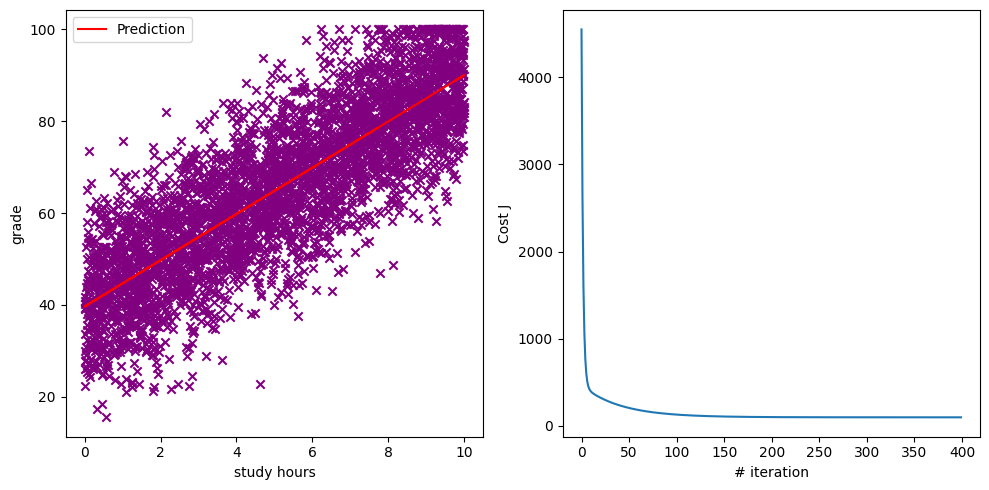

In [ ]:
model.get_plots()

# Linear Regression with One Feature (scikit-learn)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Preparing Data for Scikit-learn (Reshaping X)

Scikit-learn models typically expect a 2D array for the features (`X`), even if there's only one feature. We reshape our `X` array from `(n,)` to `(n, 1)` to meet this requirement.

In [ ]:
X, y = dataset[:, 0].reshape(-1, 1), dataset[:, 1]
print(X)

[[9.15]
 [9.37]
 [2.86]
 ...
 [9.91]
 [6.91]
 [0.54]]


### Splitting Data into Training and Test Sets for Scikit-learn

Similar to our custom model, we split the reshaped data into training and test sets using `train_test_split` for the Scikit-learn implementation.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.25,
    random_state = 42,
    shuffle = True
)

### Initializing and Training the Scikit-learn Model

We initialize a `LinearRegression` model from scikit-learn and then fit it to our training data (`X_train`, `y_train`).

In [ ]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

### Generating Predictions with the Scikit-learn Model

After training, we use the fitted Scikit-learn model to make predictions on both the training and test datasets.

In [ ]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

# Our Model VS Scikit-learn

In [ ]:
print("----------------------------------------------------------")
print(f"OUR MODEL:")
print(f"weight: {model.weight}, Bias: {model.bias}")
print(f"train MSE: {model.cost_history[-1]}")
print(f"test MSE: {model.get_test_cost()}")
print("----------------------------------------------------------")
print("SCIKITLEARN-LEARN MODEL:")
print(f"weight: {model2.coef_[0]}, Bias: {model2.intercept_}")
print(f"train MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"test MSE: {mean_squared_error(y_test, y_test_pred)}")
print("----------------------------------------------------------")

----------------------------------------------------------
OUR MODEL:
weight: 5.037458461905065, Bias: 39.652899096196876
train MSE: 97.76242278226059
test MSE: 102.287864789283
----------------------------------------------------------
SCIKITLEARN-LEARN MODEL:
weight: 4.995850399382755, Bias: 39.930622568126665
train MSE: 97.74263220022156
test MSE: 102.37004459820353
----------------------------------------------------------
